In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
import matplotlib.gridspec as gridspec
rcParams['font.family'] = 'Times New Roman'
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [13]:
mlm_df = pd.read_csv("val_0.5_vis4lang.tsv", sep='\t')
mlm_df.tail()

,Unnamed: 0,Model,Mask,MLM
358,388,LXMERT_s93,All,5.787218
359,389,ViLBERT_s93,All,5.912675
360,390,VL-BERT_s93,All,6.345583
361,391,VisualBERT_s93,All,5.525242
362,392,UNITER_s93,All,6.037891


In [14]:
mrc_df = pd.read_csv("val_0.5_lang4vis.tsv", sep='\t')
mrc_df.tail()

,Unnamed: 0,Model,Mask,MRC-KL,MRC-XE
199,199,LXMERT_s93,None,0.512971,17.123792
200,200,ViLBERT_s93,None,0.681373,16.939777
201,201,VL-BERT_s93,None,0.609146,17.416389
202,202,VisualBERT_s93,None,2.953485,14.996272
203,203,UNITER_s93,None,0.590068,17.192678


# Standard Models

In [15]:
models = ['LXMERT', 'ViLBERT', 'VL-BERT', 'VisualBERT', 'UNITER']
model2label = {x: x for x in models}
colors = ['#009E73', '#E69F00', '#CC79A7', '#0072B2', '#56B4E9', '#F0E442']
markers = ['d', 'D', 'P', 'o', 's']

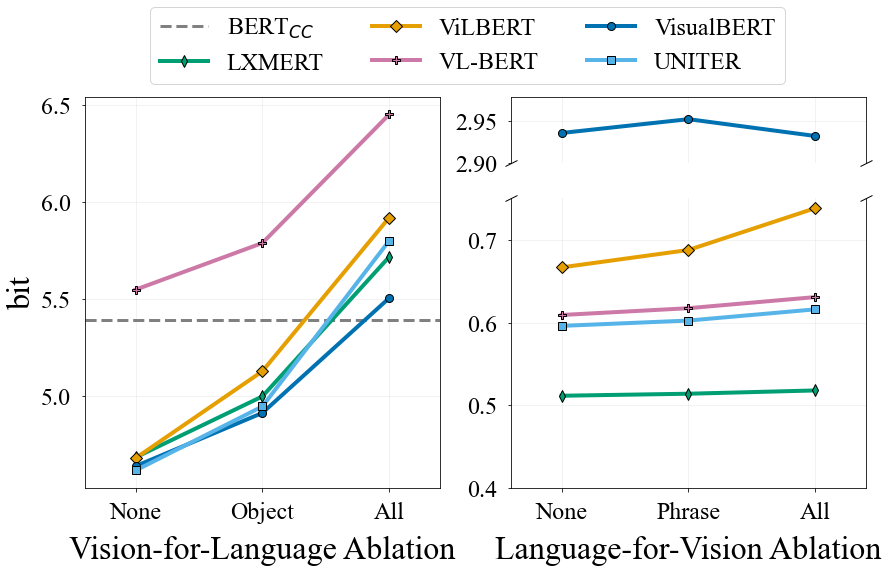

In [16]:
f = plt.figure(figsize=(14,8))

ylim  = [2.9, 2.98]
ylim2 = [.4, .75]
ylimratio = (ylim[1]-ylim[0])/(ylim2[1]-ylim2[0]+ylim[1]-ylim[0])
ylim2ratio = (ylim2[1]-ylim2[0])/(ylim2[1]-ylim2[0]+ylim[1]-ylim[0])
gs = gridspec.GridSpec(2, 2, height_ratios=[ylimratio, ylim2ratio], width_ratios=[1,1])
ax = f.add_subplot(gs[:,0])
ax1 = f.add_subplot(gs[0,1])
ax2 = f.add_subplot(gs[1,1])
ax.grid(alpha=0.2)
ax1.grid(alpha=0.2)
ax2.grid(alpha=0.2)


xs = ["None"] + ["0.%d" % d for d in range(5,4,-1)] + ["All"]
ys = np.zeros((len(xs), len(models)))
for im, m in enumerate(models):
    for ix, x in enumerate(xs):
        ys[ix, im] = mlm_df[(mlm_df['Model'] == m) & (mlm_df['Mask'] == x)]['MLM'].values[0]

ax.axhline(mlm_df[(mlm_df['Model'] == 'BERT-CC')]['MLM'].values[0], ls='--', lw=3, color='gray', label='BERT$_{CC}$')
for iy, y in enumerate(range(ys.shape[1])):
    ax.plot(xs, ys[:,iy], color=colors[iy], ms=8, marker=markers[iy], markeredgecolor='k', lw=4, label=model2label[models[iy]])
    
ax.set_ylabel("bit", fontsize=32)
ax.set_xticklabels(["None", "Object", "All"])
ax.set_xlabel("Vision-for-Language Ablation", fontsize=32, labelpad=12)
ax.tick_params(labelsize=24, pad=10)
lgd = ax.legend(loc='upper left', ncol=3, bbox_to_anchor=(0.15, 0.76, 0.5, 0.5), fontsize=24)
ax.grid(alpha=0.2)

ax.margins(x=0.2)

xs = ["None"] + ["Phrase"] + ["All"]
ys = np.zeros((len(xs), len(models)))
for im, m in enumerate(models):
    for ix, x in enumerate(xs):
        ys[ix, im] = mrc_df[(mrc_df['Model'] == m) & (mrc_df['Mask'] == x)]['MRC-KL'].values[0]
for iy, y in enumerate(range(ys.shape[1])):
    ax1.plot(xs, ys[:,iy], color=colors[iy], ms=8, marker=markers[iy], markeredgecolor='k', lw=4, label=model2label[models[iy]])
    ax2.plot(xs, ys[:,iy], color=colors[iy], ms=8, marker=markers[iy], markeredgecolor='k', lw=4, label=model2label[models[iy]])
        
ax1.set_ylim(ylim)
ax2.set_ylim(ylim2)

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(top=False, labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12, linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax2.set_xlabel("Language-for-Vision Ablation", fontsize=32, labelpad=12)
ax2.set_xticklabels(["None", "Phrase", "All"])
ax1.tick_params(labelsize=24, pad=10)
ax2.tick_params(labelsize=24, pad=10)
ax1.grid(alpha=0.2)
ax2.grid(alpha=0.2)

ax1.margins(x=0.2)
ax2.margins(x=0.2)

plt.gcf().subplots_adjust(bottom=0.2)
f.savefig("figures/standard_mlm_mrckl.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

## MLM Threshold 

In [17]:
models = ['LXMERT', 'ViLBERT', 'VL-BERT', 'VisualBERT', 'UNITER']
model2label = {x: x for x in models}
colors = ['#009E73', '#E69F00', '#CC79A7', '#0072B2', '#56B4E9', '#F0E442']
markers = ['d', 'D', 'P', 'o', 's']

In [18]:
percs = [0.0, 0.07, 0.09, 0.12, 0.15, 0.18, 0.22, 0.27, 0.33, 0.42, 0.63, 1.0]

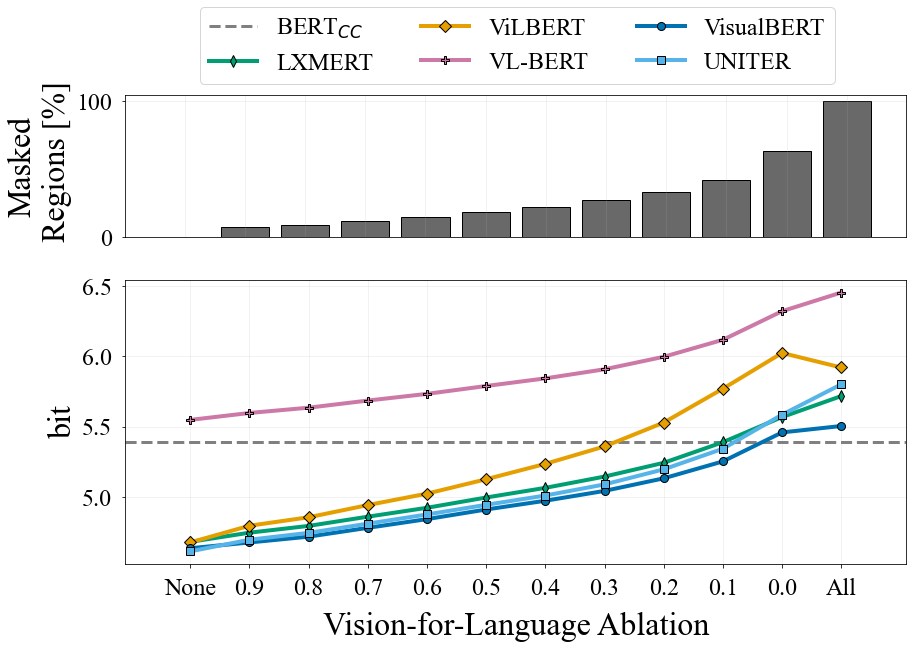

In [19]:
f = plt.figure(figsize=(14,9))

ylim  = [6.5, 7.5]
ylim2 = [4.5, 6.5]
ylimratio = (ylim[1]-ylim[0])/(ylim2[1]-ylim2[0]+ylim[1]-ylim[0])
ylim2ratio = (ylim2[1]-ylim2[0])/(ylim2[1]-ylim2[0]+ylim[1]-ylim[0])
gs = gridspec.GridSpec(2, 1, height_ratios=[ylimratio, ylim2ratio], width_ratios=[1])
ax1 = f.add_subplot(gs[0])
ax2 = f.add_subplot(gs[1])
ax1.grid(alpha=0.2)
ax2.grid(alpha=0.2)

xs = ["None"] + ["0.%d" % d for d in range(9,-1,-1)] + ["All"]
ys = np.zeros((len(xs), len(models)))
for im, m in enumerate(models):
    for ix, x in enumerate(xs):
        ys[ix, im] = mlm_df[(mlm_df['Model'] == m) & (mlm_df['Mask'] == x)]['MLM'].values[0]

ax2.axhline(mlm_df[(mlm_df['Model'] == 'BERT-CC')]['MLM'].values[0], ls='--', lw=3, color='gray', label=r'BERT$_{CC}$')
for iy, y in enumerate(range(ys.shape[1])):
    ax2.plot(xs, ys[:,iy], color=colors[iy], ms=8, marker=markers[iy], markeredgecolor='k', lw=4, label=model2label[models[iy]])
    
ax2.set_ylabel("bit", fontsize=32)
ax2.set_xlabel("Vision-for-Language Ablation", fontsize=32, labelpad=12)
ax2.tick_params(labelsize=24, pad=10)
lgd = ax2.legend(loc='upper left', ncol=3, bbox_to_anchor=(0.08, 1.5, 0.5, 0.5), fontsize=24)
ax2.margins(x=0.1)

ax1.bar(xs, [100*p for p in percs], color='dimgrey', edgecolor='k')
ax1.set_ylabel("Masked\n Regions [%]", fontsize=32)
ax1.tick_params(labelsize=24, pad=10)
ax1.tick_params(bottom=False, labelbottom=False)  # don't put tick labels at the top

plt.gcf().subplots_adjust(top=.85)

f.savefig("figures/standard_mlm_thr.pdf", bbox_extra_artists=(lgd,), bbox_anchor="tight")

## Seed

In [20]:
models = ['LXMERT', 'ViLBERT', 'VL-BERT', 'VisualBERT', 'UNITER']
model2label = {x: x for x in models}
colors = ['#009E73', '#E69F00', '#CC79A7', '#0072B2', '#56B4E9', '#F0E442']
markers = ['d', 'D', 'P', 'o', 's']
names = ['LXMERT_s%s', 'ViLBERT_s%s', 'VL-BERT_s%s', 'VisualBERT_s%s', 'UNITER_s%s']
seeds = ['0', '1234', '27', '33', '42', '54', '69', '73', '89', '93']

In [21]:
xs = ["None"] + ["0.%d" % d for d in range(5,4,-1)] + ["All"]

ys = np.zeros((len(xs), len(models)))
es = np.zeros((len(xs), len(models)))

none_d = defaultdict(list)
ref_d = defaultdict(list)
all_d = defaultdict(list)

for ix, x in enumerate(xs):
    for im, m in enumerate(models):
        for s in seeds:
            if x == "None":
                none_d[m].append(mlm_df[(mlm_df['Model'] == m + '_s%s' % s) & (mlm_df['Mask'] == x)]['MLM'].values[0])
            elif x == "All":
                all_d[m].append(mlm_df[(mlm_df['Model'] == m + '_s%s' % s) & (mlm_df['Mask'] == x)]['MLM'].values[0])
            else:
                ref_d[m].append(mlm_df[(mlm_df['Model'] == m + '_s%s' % s) & (mlm_df['Mask'] == x)]['MLM'].values[0])

for ix, x in enumerate(xs):
    for im, m in enumerate(models):
        if x == "None":
            ys[ix, im] = np.mean(none_d[m])
            es[ix, im] = np.var(none_d[m])
        elif x == "All":
            ys[ix, im] = np.mean(all_d[m])
            es[ix, im] = np.var(all_d[m])
        else:
            ys[ix, im] = np.mean(ref_d[m])
            es[ix, im] = np.var(ref_d[m])

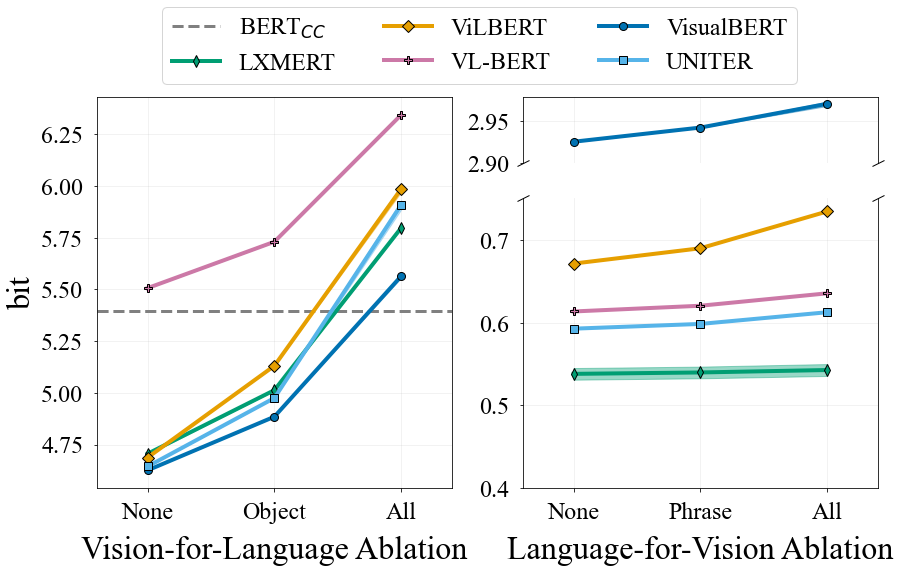

In [22]:
f = plt.figure(figsize=(14,8))

ylim  = [2.9, 2.98]
ylim2 = [.4, .75]
ylimratio = (ylim[1]-ylim[0])/(ylim2[1]-ylim2[0]+ylim[1]-ylim[0])
ylim2ratio = (ylim2[1]-ylim2[0])/(ylim2[1]-ylim2[0]+ylim[1]-ylim[0])
gs = gridspec.GridSpec(2, 2, height_ratios=[ylimratio, ylim2ratio], width_ratios=[1,1])
ax = f.add_subplot(gs[:,0])
ax1 = f.add_subplot(gs[0,1])
ax2 = f.add_subplot(gs[1,1])
ax.grid(alpha=0.2)
ax1.grid(alpha=0.2)
ax2.grid(alpha=0.2)

xs = ["None"] + ["0.%d" % d for d in range(5,4,-1)] + ["All"]
ys = np.zeros((len(xs), len(models)))
es = np.zeros((len(xs), len(models)))
none_d = defaultdict(list)
ref_d = defaultdict(list)
all_d = defaultdict(list)
for ix, x in enumerate(xs):
    for im, m in enumerate(models):
        for s in seeds:
            if x == "None":
                none_d[m].append(mlm_df[(mlm_df['Model'] == m + '_s%s' % s) & (mlm_df['Mask'] == x)]['MLM'].values[0])
            elif x == "All":
                all_d[m].append(mlm_df[(mlm_df['Model'] == m + '_s%s' % s) & (mlm_df['Mask'] == x)]['MLM'].values[0])
            else:
                ref_d[m].append(mlm_df[(mlm_df['Model'] == m + '_s%s' % s) & (mlm_df['Mask'] == x)]['MLM'].values[0])
for ix, x in enumerate(xs):
    for im, m in enumerate(models):
        if x == "None":
            ys[ix, im] = np.mean(none_d[m])
            es[ix, im] = np.var(none_d[m])
        elif x == "All":
            ys[ix, im] = np.mean(all_d[m])
            es[ix, im] = np.var(all_d[m])
        else:
            ys[ix, im] = np.mean(ref_d[m])
            es[ix, im] = np.var(ref_d[m])

ax.axhline(mlm_df[(mlm_df['Model'] == 'BERT-CC')]['MLM'].values[0], ls='--', lw=3, color='gray', label='BERT$_{CC}$')
for iy, y in enumerate(range(ys.shape[1])):
    ax.plot(xs, ys[:,iy], color=colors[iy], ms=8, marker=markers[iy], markeredgecolor='k', lw=4, label=model2label[models[iy]])
    ax.fill_between(xs, ys[:,iy]-es[:,iy], ys[:,iy]+es[:,iy], color=colors[iy], alpha=0.4)
    
ax.set_ylabel("bit", fontsize=32)
ax.set_xticklabels(["None", "Object", "All"])
ax.set_xlabel("Vision-for-Language Ablation", fontsize=32, labelpad=12)
ax.tick_params(labelsize=24, pad=10)
lgd = ax.legend(loc='upper left', ncol=3, bbox_to_anchor=(0.15, 0.76, 0.5, 0.5), fontsize=24)
ax.grid(alpha=0.2)

ax.margins(x=0.2)

xs = ["None"] + ["Phrase"] + ["All"]
ys = np.zeros((len(xs), len(models)))
es = np.zeros((len(xs), len(models)))
none_d = defaultdict(list)
ref_d = defaultdict(list)
all_d = defaultdict(list)
for ix, x in enumerate(xs):
    for im, m in enumerate(models):
        for s in seeds:
            if x == "None":
                none_d[m].append(mrc_df[(mrc_df['Model'] == m + '_s%s' % s) & (mrc_df['Mask'] == x)]['MRC-KL'].values[0])
            elif x == "All":
                all_d[m].append(mrc_df[(mrc_df['Model'] == m + '_s%s' % s) & (mrc_df['Mask'] == x)]['MRC-KL'].values[0])
            else:
                ref_d[m].append(mrc_df[(mrc_df['Model'] == m + '_s%s' % s) & (mrc_df['Mask'] == x)]['MRC-KL'].values[0])
for ix, x in enumerate(xs):
    for im, m in enumerate(models):
        if x == "None":
            ys[ix, im] = np.mean(none_d[m])
            es[ix, im] = np.var(none_d[m])
        elif x == "All":
            ys[ix, im] = np.mean(all_d[m])
            es[ix, im] = np.var(all_d[m])
        else:
            ys[ix, im] = np.mean(ref_d[m])
            es[ix, im] = np.var(ref_d[m])

for iy, y in enumerate(range(ys.shape[1])):
    ax1.plot(xs, ys[:,iy], color=colors[iy], ms=8, marker=markers[iy], markeredgecolor='k', lw=4, label=model2label[models[iy]])
    ax1.fill_between(xs, ys[:,iy]-es[:,iy], ys[:,iy]+es[:,iy], color=colors[iy], alpha=0.4)
    ax2.plot(xs, ys[:,iy], color=colors[iy], ms=8, marker=markers[iy], markeredgecolor='k', lw=4, label=model2label[models[iy]])
    ax2.fill_between(xs, ys[:,iy]-es[:,iy], ys[:,iy]+es[:,iy], color=colors[iy], alpha=0.4)
        
ax1.set_ylim(ylim)
ax2.set_ylim(ylim2)

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(top=False, labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12, linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax2.set_xlabel("Language-for-Vision Ablation", fontsize=32, labelpad=12)
ax2.set_xticklabels(["None", "Phrase", "All"])
ax1.tick_params(labelsize=24, pad=10)
ax2.tick_params(labelsize=24, pad=10)
ax1.grid(alpha=0.2)
ax2.grid(alpha=0.2)

ax1.margins(x=0.2)
ax2.margins(x=0.2)

plt.gcf().subplots_adjust(bottom=0.2)
f.savefig("figures/standard_seed_mlm_mrckl.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

# Pretraining Initialization

In [23]:
models = ['ViLBERT', 'ViLBERT_rnd-vl', 
          'UNITER', 'UNITER_rnd-vl', 'UNITER_rnd-v-vl', 'UNITER_bert-v-vl']
model2label = {x: x for x in models}
colors = ['#E69F00', '#E69F00', '#56B4E9', '#56B4E9', '#56B4E9', '#56B4E9']
markers = ['D', 'D', 's', 's', 's', 's']
linestyles = ['-', (0, (5, 10)), '-', (0, (5, 10)), (0, (3, 10)), ':']

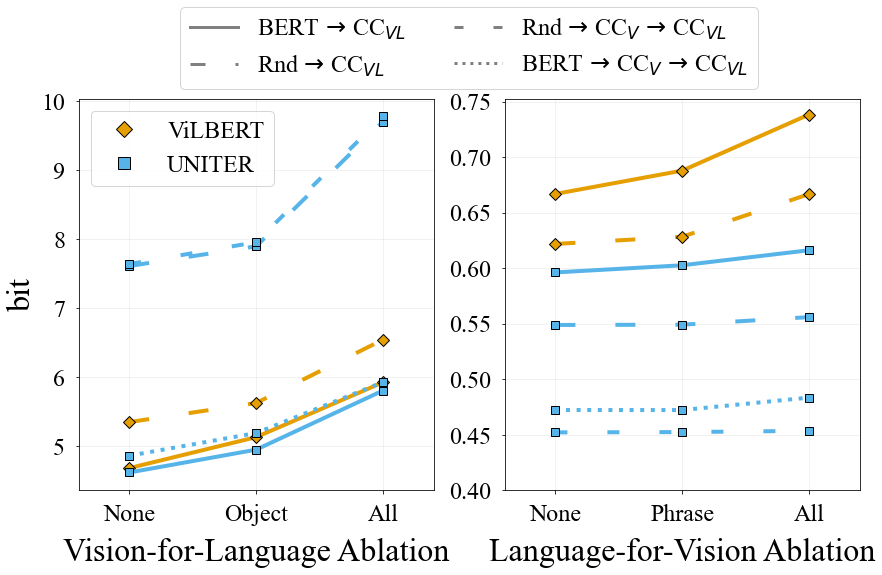

In [25]:
f, axs = plt.subplots(1,2,figsize=(14,8))

ax = axs[0]
xs = ["None"] + ["0.%d" % d for d in range(5,4,-1)] + ["All"]
ys = np.zeros((len(xs), len(models)))
for im, m in enumerate(models):
    for ix, x in enumerate(xs):
        ys[ix, im] = mlm_df[(mlm_df['Model'] == m) & (mlm_df['Mask'] == x)]['MLM'].values[0]
for iy, y in enumerate(range(ys.shape[1])):
    ax.plot(xs, ys[:,iy], color=colors[iy], ms=8, lw=4, marker=markers[iy], markeredgecolor='k', ls=linestyles[iy])
ax.set_ylabel("bit", fontsize=32)
ax.set_xlabel("Vision-for-Language Ablation", fontsize=32, labelpad=12)
ax.set_xticklabels(["None", "Object", "All"])
ax.tick_params(labelsize=24, pad=10)
ax.grid(alpha=0.2)

ax.margins(x=0.2)

legend_elements = [
    Line2D([0], [0], marker='D', color=colors[0], label='ViLBERT', markerfacecolor=colors[0], markeredgecolor='k', linewidth=0),
    Line2D([0], [0], marker='s', color=colors[2], label='UNITER', markerfacecolor=colors[2], markeredgecolor='k', linewidth=0),
]
lgd1 = ax.legend(handles=legend_elements, loc='upper left', ncol=1, fontsize=24, markerscale=2)

ax = axs[1]
xs = ["None"] + ["Phrase"] + ["All"]
ys = np.zeros((len(xs), len(models)))
for im, m in enumerate(models):
    for ix, x in enumerate(xs):
        ys[ix, im] = mrc_df[(mrc_df['Model'] == m) & (mrc_df['Mask'] == x)]['MRC-KL'].values[0]
for iy, y in enumerate(range(ys.shape[1])):
    ax.plot(xs, ys[:,iy], color=colors[iy], ms=8, lw=4, marker=markers[iy], markeredgecolor='k', ls=linestyles[iy])
ax.set_xlabel("Language-for-Vision Ablation", fontsize=32, labelpad=12)
ax.set_xticklabels(["None", "Phrase", "All"])
ax.tick_params(labelsize=24, pad=10)
ax.grid(alpha=0.2)

legend_elements = [
    Line2D([0], [0], marker='s', color='gray', label=r'BERT $\!\rightarrow\!$ CC$_{VL}$', 
           markerfacecolor=colors[1], linewidth=3, markersize=0, linestyle=linestyles[2]),
    Line2D([0], [0], marker='s', color='gray', label=r'Rnd $\!\rightarrow\!$ CC$_{VL}$', 
           markerfacecolor=colors[1], linewidth=3, markersize=0, linestyle=linestyles[3]),
    Line2D([0], [0], marker='s', color='gray', label=r'Rnd $\!\rightarrow\!$ CC$_V$ $\!\rightarrow\!$ CC$_{VL}$', 
           markerfacecolor=colors[1], linewidth=3, markersize=0, linestyle=linestyles[4]),
    Line2D([0], [0], marker='s', color='gray', label=r'BERT $\!\rightarrow\!$ CC$_V$ $\!\rightarrow\!$ CC$_{VL}$', 
           markerfacecolor=colors[1], linewidth=3, markersize=0, linestyle=linestyles[5]),
]
lgd2 = ax.legend(handles=legend_elements, loc='center', ncol=2, bbox_to_anchor=(-.35, 0.88, 0.5, 0.5), fontsize=24)

ax.margins(x=0.2)
ax.set_ylim(0.4)

plt.gcf().subplots_adjust(bottom=0.15, top=.83)

f.savefig("figures/init_mlm_mrckl.pdf", bbox_extra_artists=(lgd2,), bbox_anchor="tight")

# Threshold (& masking)

In [26]:
models = ['UNITER-thr02', 'UNITER-thr04', 'UNITER-thr06', 'UNITER-thr10', 
          'UNITER-thr02iot', 'UNITER-thr04iot', 'UNITER-thr06iot']
model2label = {'UNITER-thr02': '0.2', 'UNITER-thr04': '0.4', 'UNITER-thr06': '0.6', 
               'UNITER-thr10': 'None', 'UNITER-thr02iot': '0.2', 
               'UNITER-thr04iot': '0.4', 'UNITER-thr06iot': '0.6'}
colors = ['#56B4E9', '#56B4E9', '#56B4E9', '#56B4E9', '#D55E00', '#D55E00', '#D55E00']
markers = ['s', 's', 's', 's', 's', 's', 's']
linestyles = [':' , '-', (0, (3, 10)), (0, (5, 10)), ':' , '-', (0, (3, 10))]

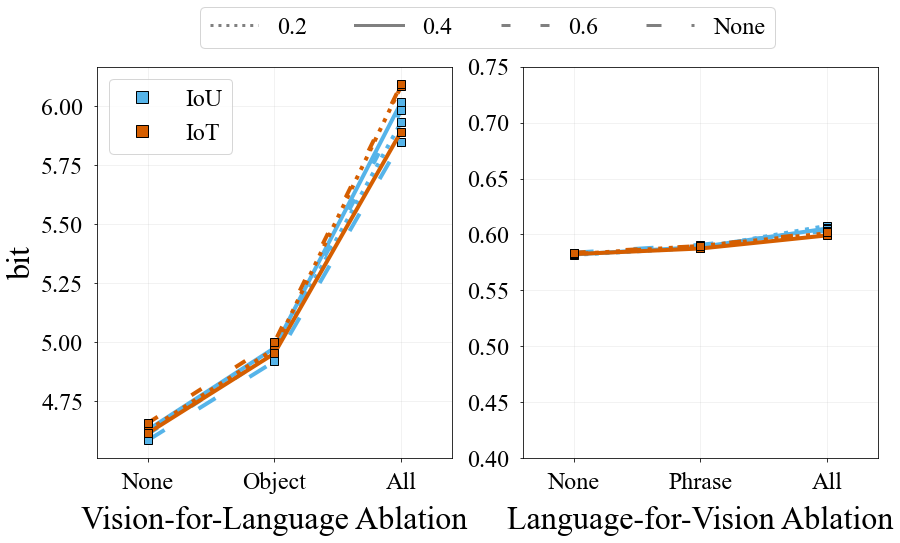

In [27]:
f, axs = plt.subplots(1,2,figsize=(14,8))

ax = axs[0]
xs = ["None"] + ["0.%d" % d for d in range(5,4,-1)] + ["All"]
ys = np.zeros((len(xs), len(models)))
for im, m in enumerate(models):
    for ix, x in enumerate(xs):
        ys[ix, im] = mlm_df[(mlm_df['Model'] == m) & (mlm_df['Mask'] == x)]['MLM'].values[0]
for iy, y in enumerate(range(ys.shape[1])):
    ax.plot(xs, ys[:,iy], color=colors[iy], ms=8, lw=4, marker=markers[iy], markeredgecolor='k', ls=linestyles[iy])
ax.set_ylabel("bit", fontsize=32)
ax.set_xlabel("Vision-for-Language Ablation", fontsize=32, labelpad=12)
ax.set_xticklabels(["None", "Object", "All"])
ax.tick_params(labelsize=24, pad=10)
ax.grid(alpha=0.2)

ax.margins(x=0.2)

legend_elements = [
    Line2D([0], [0], marker='s', color=colors[0], label='IoU', markerfacecolor=colors[0], markeredgecolor='k', linewidth=0),
    Line2D([0], [0], marker='s', color=colors[2], label='IoT', markerfacecolor=colors[-1], markeredgecolor='k', linewidth=0),
]
lgd1 = ax.legend(handles=legend_elements, loc='upper left', ncol=1, fontsize=24, markerscale=2)

ax = axs[1]
xs = ["None"] + ["Phrase"] + ["All"]
ys = np.zeros((len(xs), len(models)))
for im, m in enumerate(models):
    for ix, x in enumerate(xs):
        ys[ix, im] = mrc_df[(mrc_df['Model'] == m) & (mrc_df['Mask'] == x)]['MRC-KL'].values[0]
for iy, y in enumerate(range(ys.shape[1])):
    ax.plot(xs, ys[:,iy], color=colors[iy], ms=8, lw=4, marker=markers[iy], markeredgecolor='k', ls=linestyles[iy])
ax.set_xlabel("Language-for-Vision Ablation", fontsize=32, labelpad=12)
ax.set_xticklabels(["None", "Phrase", "All"])
ax.tick_params(labelsize=24, pad=10)
ax.grid(alpha=0.2)

legend_elements = [
    Line2D([0], [0], marker='s', color='gray', label=r'0.2', 
           markerfacecolor=colors[1], linewidth=3, markersize=0, linestyle=linestyles[0]),
    Line2D([0], [0], marker='s', color='gray', label=r'0.4', 
           markerfacecolor=colors[1], linewidth=3, markersize=0, linestyle=linestyles[1]),
    Line2D([0], [0], marker='s', color='gray', label=r'0.6', 
           markerfacecolor=colors[1], linewidth=3, markersize=0, linestyle=linestyles[2]),
    Line2D([0], [0], marker='s', color='gray', label=r'None', 
           markerfacecolor=colors[1], linewidth=3, markersize=0, linestyle=linestyles[3]),
]
lgd2 = ax.legend(handles=legend_elements, loc='center', ncol=4, bbox_to_anchor=(-.35, 0.85, 0.5, 0.5), fontsize=24)

ax.margins(x=0.2)
ax.set_ylim(0.4, 0.75)

plt.gcf().subplots_adjust(bottom=0.15, top=.83)

f.savefig("figures/thr_mlm_mrckl.pdf", bbox_extra_artists=(lgd2,), bbox_anchor="tight")

# Objectives

In [28]:
models = ['UNITER-thr04', 'UNITER-xent']
model2label = {'UNITER-thr04': 'MRC-KL', 'UNITER-xent': 'MRC-XE'}
colors = ['#56B4E9', '#56B4E9', '#56B4E9', '#56B4E9', '#56B4E9']
markers = ['s', 's', 's', 's', 's', 's', 's']
linestyles = ['-', ':', (0, (3, 10)), (0, (5, 10))]

In [29]:
cmap = matplotlib.cm.get_cmap('Blues')
colors = [cmap(0.8), cmap(0.6), cmap(0.4), cmap(0.2)]

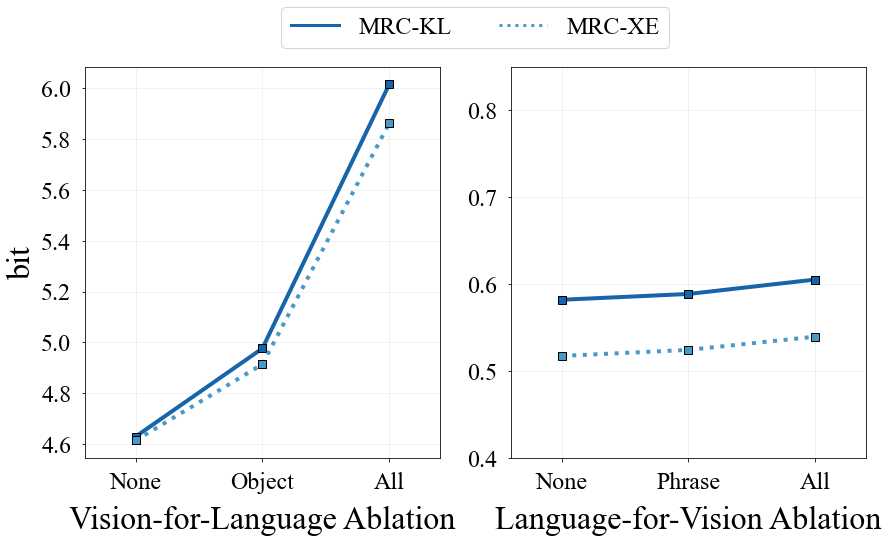

In [32]:
f, axs = plt.subplots(1,2,figsize=(14,8))

ax = axs[0]
xs = ["None"] + ["0.%d" % d for d in range(5,4,-1)] + ["All"]
ys = np.zeros((len(xs), len(models)))
for im, m in enumerate(models):
    for ix, x in enumerate(xs):
        ys[ix, im] = mlm_df[(mlm_df['Model'] == m) & (mlm_df['Mask'] == x)]['MLM'].values[0]
for iy, y in enumerate(range(ys.shape[1])):
    ax.plot(xs, ys[:,iy], color=colors[iy], ms=8, lw=4, marker=markers[iy], markeredgecolor='k', ls=linestyles[iy])
ax.set_ylabel("bit", fontsize=32)
ax.set_xlabel("Vision-for-Language Ablation", fontsize=32, labelpad=12)
ax.set_xticklabels(["None", "Object", "All"])
ax.tick_params(labelsize=24, pad=10)
ax.grid(alpha=0.2)

ax.margins(x=0.2)

ax = axs[1]
xs = ["None"] + ["Phrase"] + ["All"]
ys = np.zeros((len(xs), len(models)))
for im, m in enumerate(models):
    for ix, x in enumerate(xs):
        try:
            ys[ix, im] = mrc_df[(mrc_df['Model'] == m) & (mrc_df['Mask'] == x)]['MRC-KL'].values[0]
            if np.isnan(ys[ix, im]):
                ys[ix, im] = mrc_df[(mrc_df['Model'] == m) & (mrc_df['Mask'] == x)]['MRC-XE'].values[0]
        except:
            ys[ix, im] = -1.0
for iy, y in enumerate(range(ys.shape[1])):
    ax.plot(xs, ys[:,iy], color=colors[iy], ms=8, lw=4, marker=markers[iy], markeredgecolor='k', ls=linestyles[iy])
ax.set_xlabel("Language-for-Vision Ablation", fontsize=32, labelpad=12)
ax.set_xticklabels(["None", "Phrase", "All"])
ax.tick_params(labelsize=24, pad=10)
ax.grid(alpha=0.2)

legend_elements = [
    Line2D([0], [0], marker='s', color=colors[0], label=list(model2label.values())[0], 
           markerfacecolor=colors[1], linewidth=3, markersize=0, linestyle=linestyles[0]),
    Line2D([0], [0], marker='s', color=colors[1], label=list(model2label.values())[1], 
           markerfacecolor=colors[1], linewidth=3, markersize=0, linestyle=linestyles[1]),
]
lgd2 = ax.legend(handles=legend_elements, loc='center', ncol=4, bbox_to_anchor=(-.35, 0.85, 0.5, 0.5), fontsize=24)

ax.margins(x=0.2)
ax.set_ylim(0.4, 0.85)

plt.gcf().subplots_adjust(bottom=0.15, top=.83)

f.savefig("figures/loss_mlm_mrckl.pdf", bbox_extra_artists=(lgd2,), bbox_anchor="tight")